# View attack results data

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import sys
import os.path
import sqlite3
import pprint
stdout = sys.stdout
pp = pprint.PrettyPrinter(indent=4)
#pd.set_option('display.max_colwidth', 0)

conn = sqlite3.connect(os.path.join('results','current.db'))
dfRes = pd.read_sql('select * from results',conn)
display(dfRes.head())


,atk_type,atk_sub_type,sys_type,sys_ver,sys_ver_num,atk_date,num_guess,num_right,total_trials,reason,confidence,probability
0,simpleListUsers,Select star,reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed,NaN,NaN
1,simpleListUsers,Select AID column,reference,0.0.387,38700000,2021-02-10,100,100,100,,NaN,NaN
2,simpleHardDifference,"Simple hard difference attack with lone woman, victim does not have attribute",reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed,NaN,NaN
3,simpleStrongSuppressDetect,"Simple strong detect suppression attack, one of two known, victim present",reference,0.0.387,38700000,2021-02-10,0,0,100,,NaN,NaN
4,justTesting,Just testing a new conditionsSql,reference,0.0.387,38700000,2021-02-10,100,0,100,disallowed,NaN,NaN


### Let's look at the number of attacks per attack version

<AxesSubplot:xlabel='sys_ver'>

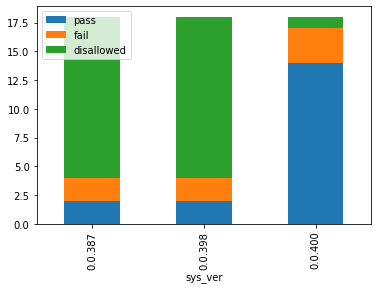

In [156]:
sys_gb_disallowed = dfRes.loc[dfRes['reason'] == 'disallowed'].groupby(['sys_ver'])
sys_gb_pass = dfRes.loc[dfRes['num_right'] > 0].groupby(['sys_ver'])
sys_gb_fail = dfRes.loc[(dfRes['num_right'] == 0) & (dfRes['reason'] != 'disallowed')].groupby(['sys_ver'])
s_pass = sys_gb_pass['atk_sub_type'].nunique()
s_fail = sys_gb_fail['atk_sub_type'].nunique()
s_disallowed = sys_gb_disallowed['atk_sub_type'].nunique()
df = pd.DataFrame({ 'pass': s_pass, 'fail': s_fail, 'disallowed': s_disallowed })
df.plot.bar(stacked=True)

### Let's get the most recent results, and see which attacks have some success

In [157]:
max_ref = dfRes['sys_ver_num'].max()
dfLatest = dfRes.loc[dfRes['sys_ver_num'] == max_ref]
#dfLatest['probability'] = dfWithGuess.apply(lambda row: (row.num_guess / row.total_trials), axis=1)
# These are the results where at least one guess was made
dfWithGuess = dfLatest.loc[dfLatest['num_guess'] > 0]
# Add a column which is the confidence score
#dfWithGuess['confidence'] = dfWithGuess.apply(lambda row: row.num_right / row.num_guess, axis=1)
dfPass = dfWithGuess.loc[dfWithGuess['confidence'] > 0]
display(dfPass[['atk_sub_type','confidence','probability']])

,atk_sub_type,confidence,probability
36,"Simple hard difference attack with lone woman, victim does not have attribute",1.00,1.00
38,Just testing a new conditionsSql,1.00,1.00
39,"Simple soft difference attack with lone woman, victim does not have attribute",1.00,1.00
40,"Simple soft difference attack with NAND'd AND group, victim does not have attribute",1.00,1.00
41,"Simple soft difference attack with NAND'd AND group, victim has attribute",0.66,1.00
42,"Simple soft difference attack with single NAND, victim has attribute",0.60,1.00
43,"Simple soft difference attack with single NAND, victim does not have attribute",1.00,1.00
44,"Simple soft difference attack with OR'd AND group, victim does not have attribute",0.66,1.00
45,"Simple soft difference attack with OR'd AND group, victim has attribute",1.00,1.00
46,"Simple soft difference attack with single OR, victim has attribute",1.00,1.00


### And which attacks fail completely

In [158]:
dfFail = dfLatest.loc[(dfLatest['num_right'] == 0) & (dfLatest['reason'] != 'disallowed')]
display(dfFail[['atk_sub_type','num_right','probability']])

,atk_sub_type,num_right,probability
37,"Simple strong detect suppression attack, one of two known, victim present",0,0.0
48,Split averaging attack to learn exact count,0,1.0
51,Select AID column,0,1.0
